In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# 1) Read

In [4]:
ofertas_relampago = pd.read_csv('ofertas_relampago.csv', parse_dates = ['OFFER_START_DATE', 
                                                                        'OFFER_START_DTTM',
                                                                        'OFFER_FINISH_DTTM'],
                                
                        dtype = {'OFFER_TYPE': np.str_,
                                'INVOLVED_STOCK': np.int32,
                                'REMAINING_STOCK_AFTER_END': np.int32,
                                'SOLD_AMOUNT': np.float32,
                                'SOLD_QUANTITY': np.float32,
                                'ORIGIN': np.str_, 
                                'SHIPPING_PAYMENT_TYPE': np.str_,
                                'DOM_DOMAIN_AGG1': np.str_,
                                'VERTICAL': np.str_,
                                'DOMAIN_ID': np.str_,
                    }    
                               )

In [5]:
ofertas_relampago.dtypes

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int32
REMAINING_STOCK_AFTER_END                  int32
SOLD_AMOUNT                              float32
SOLD_QUANTITY                            float32
ORIGIN                                    object
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object

In [6]:
ofertas_relampago.columns = ofertas_relampago.columns.str.lower() 

In [7]:
ofertas_relampago.head()

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [122]:
len(ofertas_relampago)

48746

In [123]:
ofertas_relampago['offer_start_date'].max()

Timestamp('2021-07-31 00:00:00')

In [124]:
ofertas_relampago['offer_start_date'].min()

Timestamp('2021-06-01 00:00:00')

# Criar novas variaveis

In [20]:
# ofertas_relampago['stock_%_sold'] = ofertas_relampago['sold_quantity'] / ofertas_relampago['involved_stock']
ofertas_relampago['unique_price'] =  ofertas_relampago['sold_amount'] / ofertas_relampago['sold_quantity']

In [21]:
ofertas_relampago.head()

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id,time_offer_duration,stock_%_sold,unique_price
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,7.03,1.50,0.79
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6.00,NaN,NaN
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,6.00,0.20,3.58
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,6.60,0.13,3.52
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,2.80,1.00,2.64


## 1) time_offer_duration: tempo de duração da oferta

Queremos reponder se o tempo de duração impacta nas vendas. 

In [22]:
ofertas_relampago['time_offer_duration'] = (ofertas_relampago.offer_finish_dttm-ofertas_relampago.offer_start_dttm).astype('timedelta64[m]')/60

Text(0.5, 0, 'Tempo de duração')

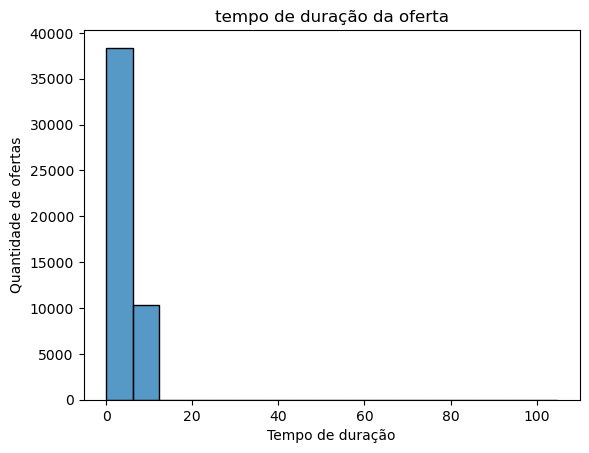

In [23]:
ax = sns.histplot(data=ofertas_relampago, x="time_offer_duration")
ax.set_title('tempo de duração da oferta')
ax.set_ylabel('Quantidade de ofertas')
ax.set_xlabel('Tempo de duração')

Os outliers estão dificultando a visualização

Text(0.5, 0, 'Tempo de duração')

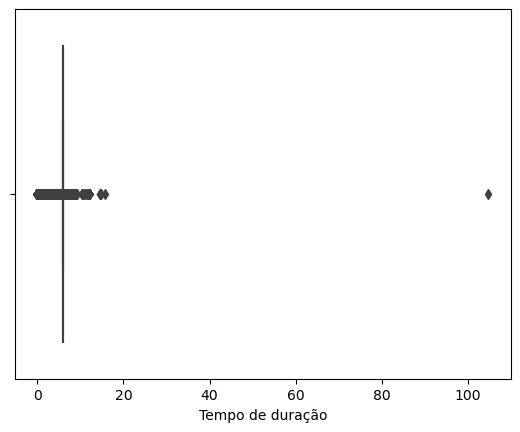

In [17]:
ax = sns.boxplot(x=ofertas_relampago["time_offer_duration"])
ax.set_xlabel('Tempo de duração')

Text(0.5, 0, 'Tempo de duração')

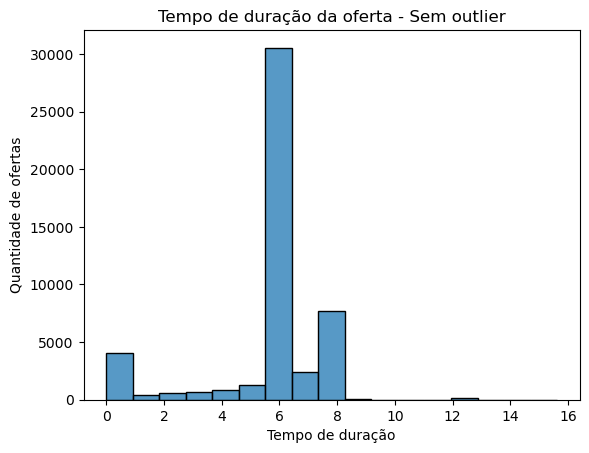

In [125]:
ax = sns.histplot(data=ofertas_relampago[ofertas_relampago['time_offer_duration']<20], x="time_offer_duration")
ax.set_title('Tempo de duração da oferta - Sem outlier')
ax.set_ylabel('Quantidade de ofertas')
ax.set_xlabel('Tempo de duração')

In [26]:
ofertas_relampago.head(2)

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id,time_offer_duration,stock_%_sold,unique_price
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,7.03,1.50,0.79
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6.00,NaN,NaN


In [130]:
# criar grupos de tempo de duração da oferta. 
ofertas_relampago['time_offer_duration_g'] = pd.cut(x=ofertas_relampago['time_offer_duration'], bins=[0, 1, 4, 6, 1000],
                    labels=['[0 a 1]', ']1 a 4]', ']4 a 6]',
                            'mais de 6 horas'])

In [131]:
ofertas_relampago.groupby("time_offer_duration_g" , dropna=False)["offer_start_date"].count().reset_index()

,time_offer_duration_g,offer_start_date
0,[0 a 1],299
1,]1 a 4],2001
2,]4 a 6],31880
3,mais de 6 horas,10752


In [133]:
# duração igual a zero
len(ofertas_relampago[ofertas_relampago['time_offer_duration_g'].isna()])

3814

In [126]:
len(ofertas_relampago)

48746

In [93]:
ofertas_relampago.head()

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id,time_offer_duration,stock_%_sold,unique_price,time_offer_duration_g,involved_stock_g
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,7.03,1.50,0.79,mais de 6 horas,EE
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6.00,NaN,NaN,]4 a 6],EE
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,6.00,0.20,3.58,]4 a 6],EE
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,6.60,0.13,3.52,mais de 6 horas,EE
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,2.80,1.00,2.64,]1 a 4],EE


In [94]:
time_offer_dur = ofertas_relampago.groupby(["time_offer_duration_g"], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()

C:\Users\marci\AppData\Local\Temp\ipykernel_4756\142358312.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_offer_dur = ofertas_relampago.groupby(["time_offer_duration_g"], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()


In [95]:
time_offer_dur['stock_%_sold'] = time_offer_dur['sold_quantity'] / time_offer_dur['involved_stock']
time_offer_dur

,time_offer_duration_g,involved_stock,sold_quantity,stock_%_sold
0,[0 a 1],4380,2307.00,0.53
1,]1 a 4],35568,25718.00,0.72
2,]4 a 6],394439,92625.00,0.23
3,mais de 6 horas,1206686,146058.00,0.12


É possivel observar que o periodo 1 a 4 horas teve mais produtos vendidos em proporção. 
No entanto outros fatores podem estar influenciando o resultado, exemplo: 

1 - Produtos com maior valor agregado recebem mais tempo para ser vendido? 

2 - Será que produtos com mais estoque tendem a vender menos? 

3 - Tipo do produto. 

### 1.2) tempo de duração por preço 

In [96]:
ofertas_relampago.groupby(["time_offer_duration_g"], dropna=False)["unique_price"].mean().reset_index()

,time_offer_duration_g,unique_price
0,[0 a 1],5.65
1,]1 a 4],6.03
2,]4 a 6],6.65
3,mais de 6 horas,17.94


Text(0.5, 0, 'Quantidade em stock')

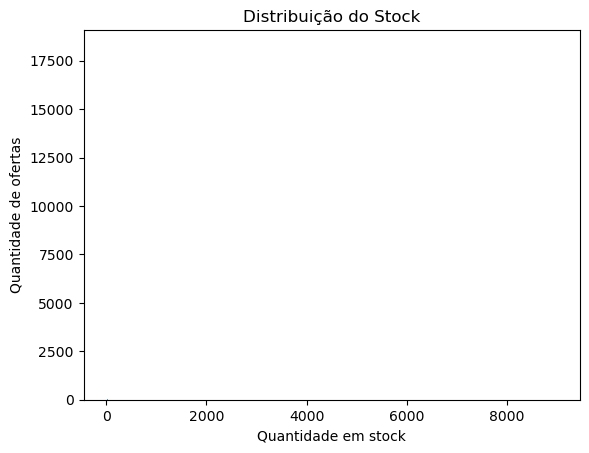

In [83]:
ax = sns.histplot(data=ofertas_relampago, x="involved_stock")
ax.set_title('Distribuição do Stock')
ax.set_ylabel('Quantidade de ofertas')
ax.set_xlabel('Quantidade em stock')

In [84]:
ofertas_relampago['involved_stock'].describe()

count   48746.00
mean       35.01
std       206.76
min         1.00
25%         5.00
50%        10.00
75%        15.00
max      9000.00
Name: involved_stock, dtype: float64

In [87]:
ofertas_relampago['involved_stock'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, .98]).tolist()

[5.0, 5.0, 5.0, 5.0, 10.0, 15.0, 15.0, 15.0, 30.0, 250.0]

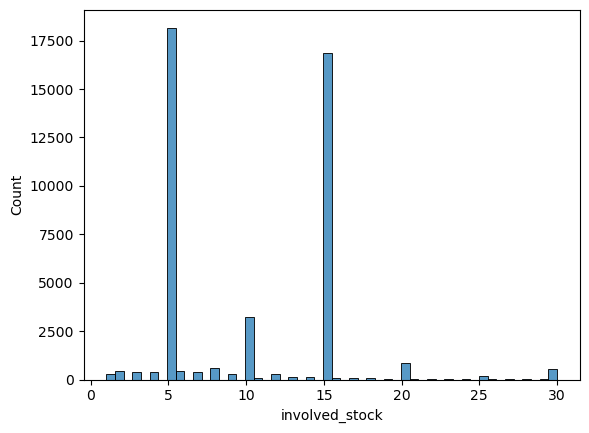

In [89]:
ax = sns.histplot(data=ofertas_relampago[ofertas_relampago['involved_stock']<=30], x="involved_stock")

Text(0.5, 0, 'Tempo de duração')

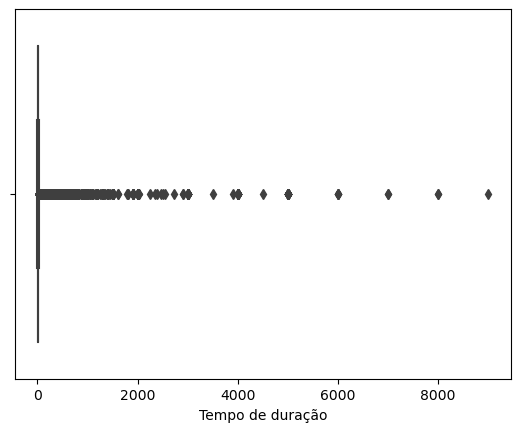

In [52]:
ax = sns.boxplot(x=ofertas_relampago["involved_stock"])
ax.set_xlabel('Tempo de duração')

In [97]:
# criar grupos de tempo de duração da oferta. 
ofertas_relampago['involved_stock_g'] = pd.cut(x=ofertas_relampago['involved_stock'], bins=[0, 5, 10, 15, 30, 10000],
                    labels=['[0 a 5]', ']5 a 10]', ']10 a 15]',
                            ']15 a 30]', 'mais de 30'])

In [104]:
ofertas_relampago.groupby(["involved_stock_g"], dropna=False)["offer_start_date"].count().reset_index() 

,involved_stock_g,offer_start_date
0,[0 a 5],19613
1,]5 a 10],5005
2,]10 a 15],17545
3,]15 a 30],2138
4,mais de 30,4445


In [101]:
time_offer_dur_stock = ofertas_relampago.groupby(["involved_stock_g", "time_offer_duration_g", ], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()

C:\Users\marci\AppData\Local\Temp\ipykernel_4756\2201620510.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_offer_dur_stock = ofertas_relampago.groupby(["involved_stock_g", "time_offer_duration_g", ], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()


In [102]:
time_offer_dur_stock['stock_%_sold'] = time_offer_dur_stock['sold_quantity'] / time_offer_dur_stock['involved_stock']
time_offer_dur_stock

,involved_stock_g,time_offer_duration_g,involved_stock,sold_quantity,stock_%_sold
0,[0 a 5],[0 a 1],728,846.00,1.16
1,[0 a 5],]1 a 4],5270,5388.00,1.02
2,[0 a 5],]4 a 6],74627,16810.00,0.23
3,[0 a 5],mais de 6 horas,7421,1001.00,0.13
4,]5 a 10],[0 a 1],305,296.00,0.97
5,]5 a 10],]1 a 4],1031,1059.00,1.03
6,]5 a 10],]4 a 6],24314,4091.00,0.17
7,]5 a 10],mais de 6 horas,15821,1555.00,0.10
8,]10 a 15],[0 a 1],1148,833.00,0.73
9,]10 a 15],]1 a 4],9484,9273.00,0.98


In [60]:
ofertas_relampago.groupby("time_offer_duration" , dropna=False)["offer_start_date"] \
                            .count().reset_index().sort_values('offer_start_date') 

,time_offer_duration,offer_start_date
467,104.75,1
415,7.28,1
417,7.37,1
421,7.43,1
377,6.43,1
...,...,...
298,5.00,330
403,7.00,1916
0,0.00,3814
437,8.00,7456



## 2 ) time_offer_start: horario que começou a oferta. 

Existe um horario mais adequado para iniciar uma oferta? 


In [107]:
ofertas_relampago.head()

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id,time_offer_duration,stock_%_sold,unique_price,time_offer_duration_g,involved_stock_g
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,7.03,1.50,0.79,mais de 6 horas,[0 a 5]
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6.00,NaN,NaN,]4 a 6],[0 a 5]
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,6.00,0.20,3.58,]4 a 6],]10 a 15]
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,6.60,0.13,3.52,mais de 6 horas,]10 a 15]
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,2.80,1.00,2.64,]1 a 4],]10 a 15]


In [110]:
ofertas_relampago['time_offer_start'] = ofertas_relampago['offer_start_dttm'].dt.hour

In [115]:
ofertas_relampago.groupby(["time_offer_start", ], dropna=False)["offer_start_date"].count().reset_index()

,time_offer_start,offer_start_date
0,0,1
1,1,54
2,2,9
3,3,8
4,4,1
5,5,1
6,6,10
7,7,12574
8,8,55
9,9,89


iremos considerar apenas os periodos que tem volumetria acima de 2mil

In [118]:
time_offer_start_stock = ofertas_relampago.groupby(["time_offer_start", ], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()

C:\Users\marci\AppData\Local\Temp\ipykernel_4756\2882088078.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_offer_start_stock = ofertas_relampago.groupby(["time_offer_start", ], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()


In [119]:
time_offer_start_stock = time_offer_start_stock[time_offer_start_stock['time_offer_start'].isin([7, 12, 13, 19])].reset_index()

In [120]:
time_offer_start_stock['stock_%_sold'] = time_offer_start_stock['sold_quantity'] / time_offer_start_stock['involved_stock']
time_offer_start_stock

,index,time_offer_start,involved_stock,sold_quantity,stock_%_sold
0,7,7,123940,19591.00,0.16
1,12,12,370312,46031.00,0.12
2,13,13,333399,61862.00,0.19
3,19,19,143010,35329.00,0.25


#### fim

In [62]:
start_time =  ofertas_relampago.groupby(['time_offer_start'])['sold_amount'].aggregate(['count', 'sum']).reset_index()
start_time['ticket'] = start_time['sum'] / start_time['count']
start_time

,time_offer_start,count,sum,ticket
0,0,0,0.00,NaN
1,1,22,5464.84,248.40
2,2,5,906.31,181.26
3,3,2,1558.09,779.05
4,4,0,0.00,NaN
5,5,0,0.00,NaN
6,6,1,10.14,10.14
7,7,5512,100284.32,18.19
8,8,12,135.00,11.25
9,9,32,7957.03,248.66


In [65]:
ofertas_relampago_mask.head()

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id,time_offer_start,time_offer_duration
467,2021-06-22,2021-06-22 15:00:00+00:00,2021-06-22 23:00:00+00:00,lightning_deal,201,156,166.10,45.00,A,free_shipping,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,15,8.00
468,2021-06-22,2021-06-22 20:00:00+00:00,2021-06-23 00:00:01+00:00,lightning_deal,286,189,345.81,171.00,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,20,4.00
469,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 11:42:17+00:00,lightning_deal,5,0,12.26,5.00,NaN,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,7,4.70
470,2021-06-22,2021-06-22 15:00:00+00:00,2021-06-22 23:00:01+00:00,lightning_deal,1000,982,595.17,19.00,A,free_shipping,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,15,8.00
471,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 08:11:03+00:00,lightning_deal,5,-3,14.22,8.00,NaN,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,7,1.18


In [69]:
ofertas_relampago_mask= ofertas_relampago[ofertas_relampago['domain_id']=='MLM-SURGICAL_AND_INDUSTRIAL_MASKS'].reset_index()
start_time =  ofertas_relampago_mask.groupby(['time_offer_start'])['sold_amount'].aggregate(['count', 'sum']).reset_index()
start_time['ticket'] = start_time['sum'] / start_time['count']
start_time

,time_offer_start,count,sum,ticket
0,6,1,10.14,10.14
1,7,90,2894.22,32.16
2,8,1,14.54,14.54
3,10,70,24945.61,356.37
4,11,256,71348.01,278.70
5,12,228,100571.67,441.10
6,13,304,79478.43,261.44
7,14,119,39933.70,335.58
8,15,167,37654.22,225.47
9,16,67,16928.76,252.67


In [71]:
mask_agg = ofertas_relampago_mask.groupby(['time_offer_start'], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()
mask_agg['sold_%'] = mask_agg['sold_quantity'] / mask_agg['involved_stock'] 

C:\Users\marci\AppData\Local\Temp\ipykernel_11908\3123286539.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mask_agg = ofertas_relampago_mask.groupby(['time_offer_start'], dropna=False)["involved_stock", "sold_quantity"].sum().reset_index()


In [72]:
mask_agg

,time_offer_start,involved_stock,sold_quantity,sold_%
0,6,200,13.00,0.07
1,7,1398,719.00,0.51
2,8,27,7.00,0.26
3,10,29002,9621.00,0.33
4,11,95977,26462.00,0.28
5,12,233937,31969.00,0.14
6,13,96456,25019.00,0.26
7,14,65826,12492.00,0.19
8,15,69542,11974.00,0.17
9,16,14465,5324.00,0.37


In [34]:
ofertas_relampago.groupby("time_offer_start", dropna=False)["sold_amount"].count().reset_index()

,time_offer_start,offer_start_date
0,0,1
1,1,54
2,2,9
3,3,8
4,4,1
5,5,1
6,6,10
7,7,12574
8,8,55
9,9,89


In [45]:
ofertas_relampago.groupby("time_offer_start", dropna=False)["sold_amount"].sum().reset_index()

,time_offer_start,sold_amount
0,0,0.00
1,1,5464.84
2,2,906.31
3,3,1558.09
4,4,0.00
5,5,0.00
6,6,10.14
7,7,100284.32
8,8,135.00
9,9,7957.03


<Axes: xlabel='time_offer_start', ylabel='Count'>

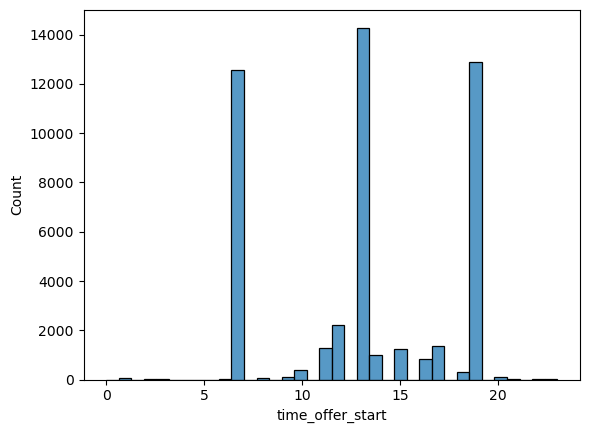

In [44]:
sns.histplot(data=ofertas_relampago, x="time_offer_start")

In [41]:
ofertas_relampago.head()

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id,time_offer_start,time_offer_duration
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,16,7.03
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,13,6.00
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,7,6.00
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,19,6.60
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,13,2.80


In [21]:
ofertas_relampago.groupby("offer_type", dropna=False)["offer_start_date"].count().reset_index()

,offer_type,offer_start_date
0,lightning_deal,48746


In [24]:
ofertas_relampago.groupby("shipping_payment_type" , dropna=False)["offer_start_date"].count().reset_index() 

,shipping_payment_type,offer_start_date
0,free_shipping,26658
1,none,22088


In [25]:
ofertas_relampago.groupby("dom_domain_agg1" , dropna=False)["offer_start_date"].count().reset_index() 

,dom_domain_agg1,offer_start_date
0,ACC TOOLS,95
1,AGRO,1
2,ANTIQUES & HOBBIES,5
3,APPAREL,3856
4,APPAREL ACCESORIES,4387
5,AUTOPARTS,1696
6,BABY,801
7,BATTERIES,105
8,BEAUTY EQUIPMENT,1099
9,"BOOKS, MULTIMEDIA & OTHER E!",498


In [26]:
ofertas_relampago.groupby("vertical" , dropna=False)["offer_start_date"].count().reset_index() 

,vertical,offer_start_date
0,ACC,2573
1,APP & SPORTS,13241
2,BEAUTY & HEALTH,7150
3,CE,8629
4,CPG,2714
5,ENTERTAINMENT,525
6,HOME & INDUSTRY,11011
7,OTHERS,279
8,T & B,2624


In [43]:
ofertas_relampago.groupby("domain_id" , dropna=False)["offer_start_date"].count().reset_index().sort_values(['offer_start_date'])

,domain_id,offer_start_date
0,MLM-3D_PENS,1
616,MLM-HOSE_ADAPTERS,1
617,MLM-HOT_WATER_BOTTLES,1
621,MLM-HYDRATION_BLADDERS,1
623,MLM-HYDRAULIC_VEHICLE_JACKS,1
...,...,...
1195,MLM-VEHICLE_LED_BULBS,454
1089,MLM-SUNGLASSES,472
723,MLM-LED_STRIPS,518
589,MLM-HEADPHONES,761
